In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})

In [57]:
dataset=pd.read_csv('house_data_prepared')
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,Total_power_consumed
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,2006,12,16,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,2006,12,17,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,2006,12,18,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,2006,12,19,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,2006,12,20,20384.800000


In [58]:
continuous_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O' and dataset[feature].dtype!='int64']
continuous_features

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'Total_power_consumed']

<AxesSubplot:>

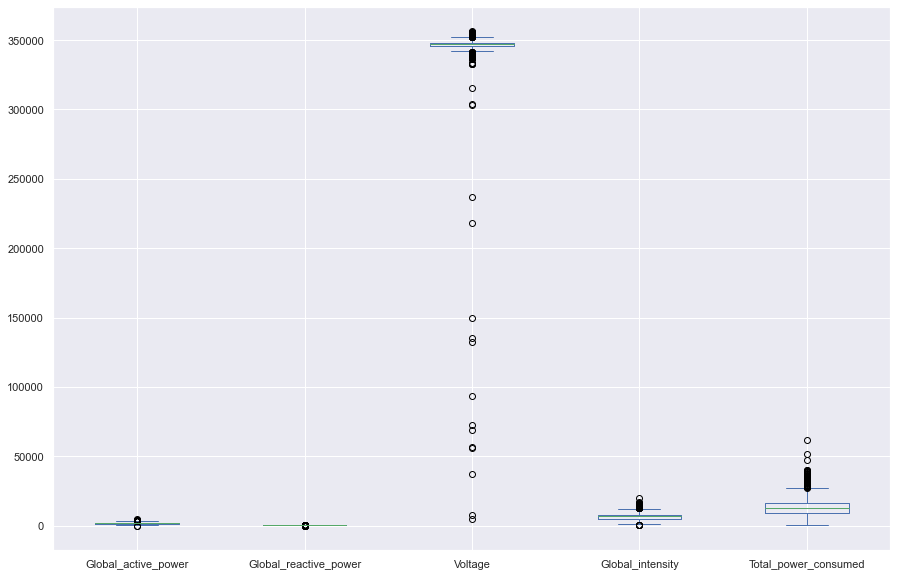

In [59]:
### Checking for Outliers 

dataset[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']].plot.box()

In [79]:
df1=dataset.copy()

In [80]:
## removing outliers using IQR method


def remove_outliers(col):
    '''Inter Quartile range'''
    
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    #return df1[df1[col] > upper_limit]

In [81]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

Upper limit 2985.47
Lower limit 73.83800000000019


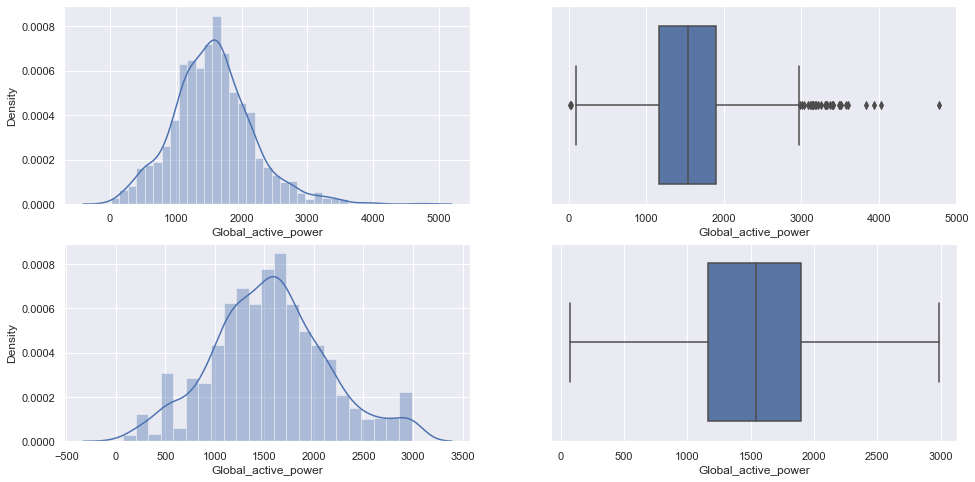

Upper limit 293.95599999999996
Lower limit 50.212000000000046


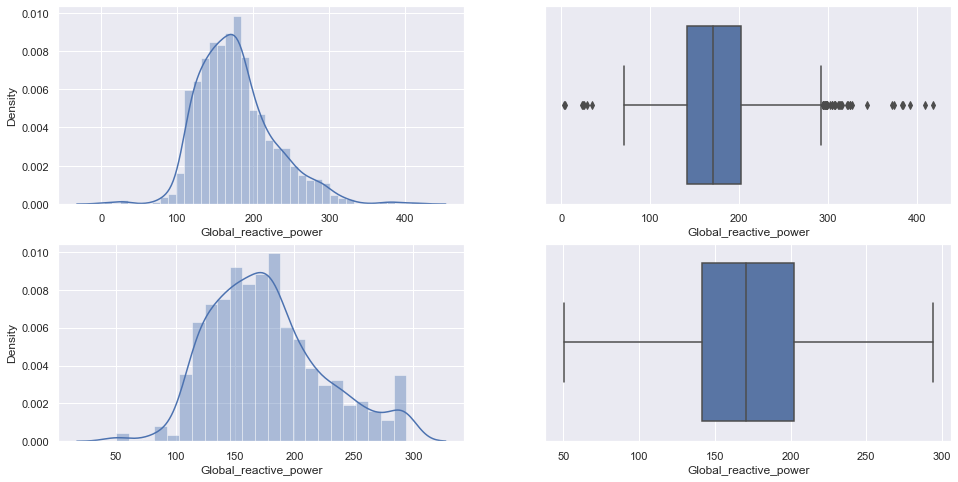

Upper limit 352163.81500000006
Lower limit 341733.05500000005


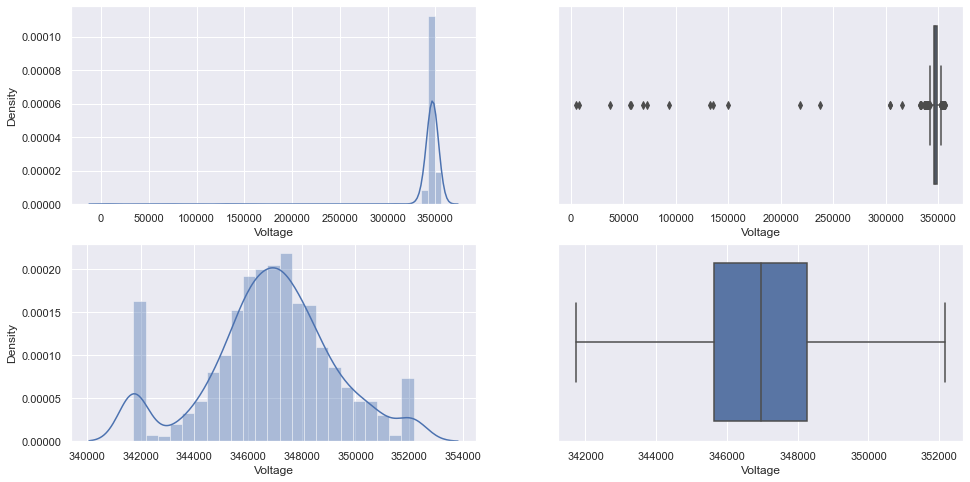

Upper limit 12375.599999999999
Lower limit 612.4000000000015


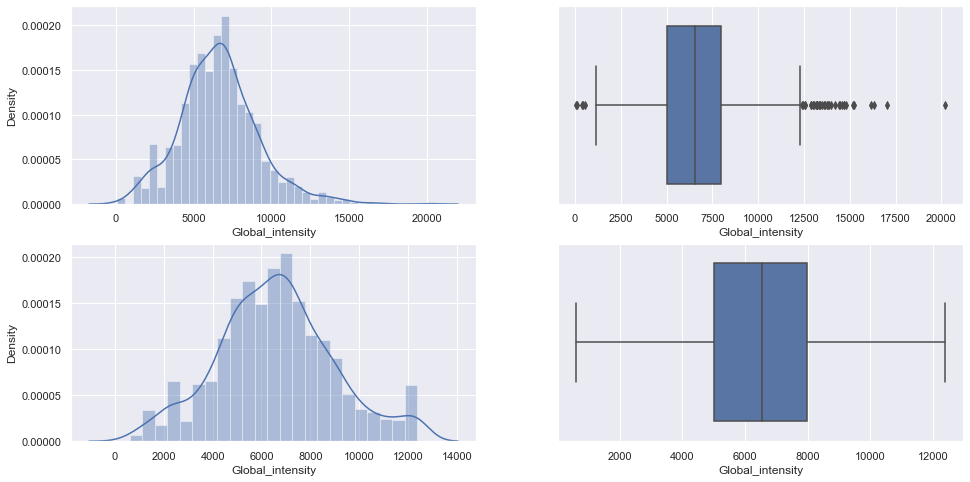

Upper limit 27354.98333333333
Lower limit -1594.7499999999982


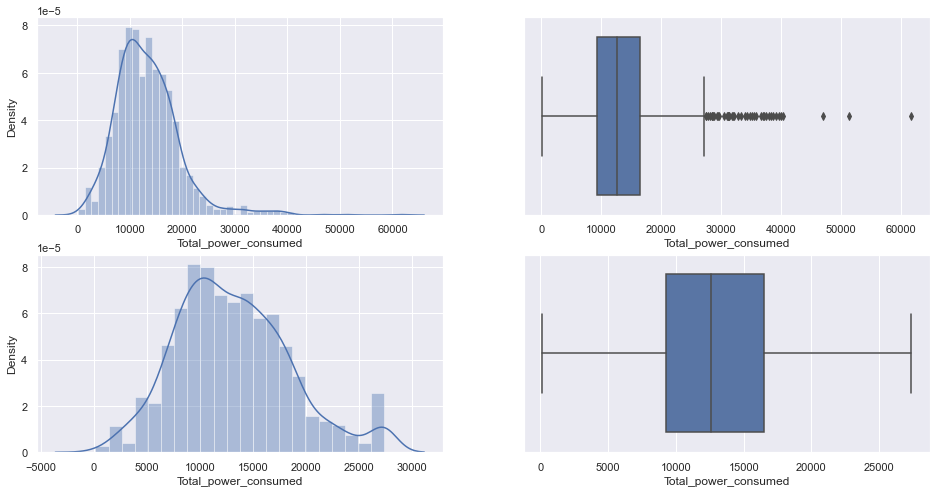

In [82]:
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']:
    remove_outliers(feature)
    create_comparison_plot(dataset,df1,feature)

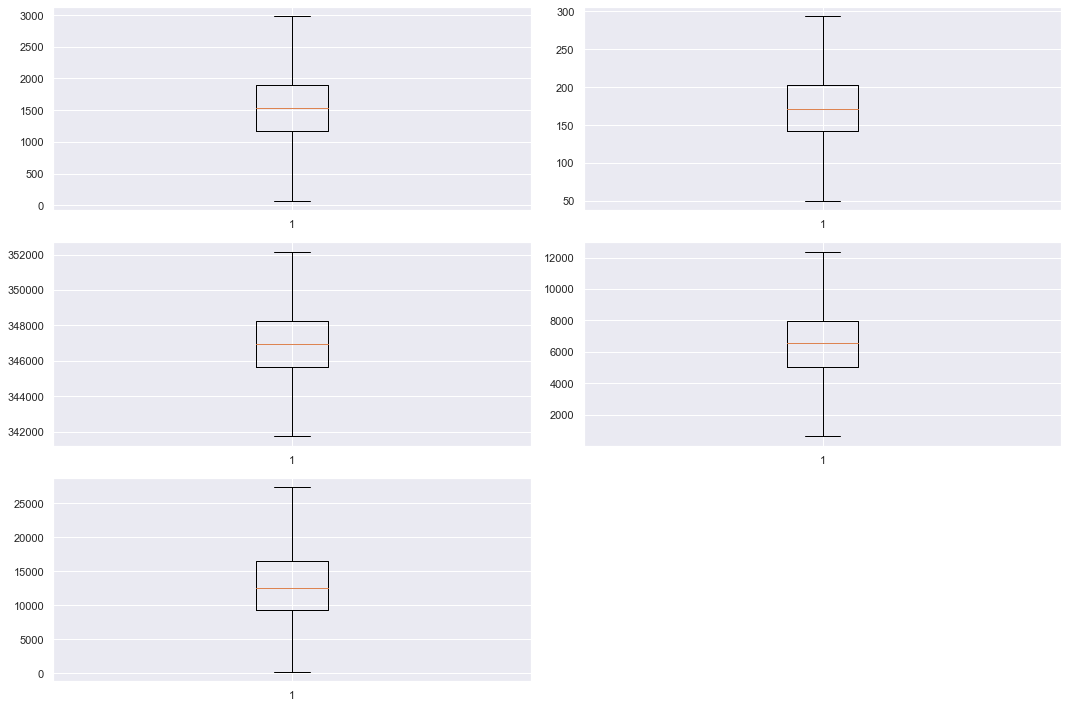

In [83]:
i=1
for feature in ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity','Total_power_consumed']:
    plt.subplot(3,2,i)
    i+=1
    plt.boxplot(df1[feature])
    plt.xlabel=feature
    plt.tight_layout()

In [84]:
dataset.skew()

Global_active_power       0.520095
Global_reactive_power     0.804067
Voltage                 -11.024939
Global_intensity          0.544181
Sub_metering_1            1.729825
Sub_metering_2            1.700689
Sub_metering_3            0.114134
year                      0.001288
month                     0.000628
day                       0.004724
Total_power_consumed      1.564515
dtype: float64

In [85]:
df1.skew()

Global_active_power      0.200931
Global_reactive_power    0.564314
Voltage                 -0.220095
Global_intensity         0.186197
Sub_metering_1           1.729825
Sub_metering_2           1.700689
Sub_metering_3           0.114134
year                     0.001288
month                    0.000628
day                      0.004724
Total_power_consumed     0.511722
dtype: float64

- We can see that the skew has reduced in `Global_active_power, Global_reactive_power,Voltage, Global_intensity, Total_power_consumed`

- We are dropping Sub_metering_1,Sub_metering_2,Sub_metering_3 because we created sum of these features as Total power consumed

In [86]:
df1.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3','year','day','month'],inplace=True,axis=1)

### As we can see no ouliers in the dataset

In [74]:
df1.to_csv('outlier_handled')

In [87]:
df1.to_csv('outlier_handled_target')